In [17]:
import psutil
import GPUtil

# CPU
cpu_count = psutil.cpu_count(logical=False)  # Physical CPU count
cpu_logical_count = psutil.cpu_count(logical=True)  # Logical CPU count

# RAM
total_memory = psutil.virtual_memory().total

# GPU
gpus = GPUtil.getGPUs()
gpu_info = []
for gpu in gpus:
    gpu_info.append({
        'id': gpu.id,
        'name': gpu.name,
        'memory_total': gpu.memoryTotal,
        'memory_used': gpu.memoryUsed,
        'memory_free': gpu.memoryFree,
        'temperature': gpu.temperature,
        'load': gpu.load
    })

print("CPU Physical Cores:", cpu_count)
print("CPU Logical Cores:", cpu_logical_count)
print("Total RAM:", total_memory)

print("\nGPU Information:")
for gpu in gpu_info:
    print("GPU ID:", gpu['id'])
    print("GPU Name:", gpu['name'])
    print("Total GPU Memory:", gpu['memory_total'])
    print("Used GPU Memory:", gpu['memory_used'])
    print("Free GPU Memory:", gpu['memory_free'])
    print("GPU Temperature:", gpu['temperature'])
    print("GPU Load:", gpu['load'])
    print("\n")


CPU Physical Cores: 18
CPU Logical Cores: 36
Total RAM: 134721097728

GPU Information:
GPU ID: 0
GPU Name: NVIDIA GeForce RTX 3090
Total GPU Memory: 24576.0
Used GPU Memory: 276.0
Free GPU Memory: 23983.0
GPU Temperature: 29.0
GPU Load: 0.0


GPU ID: 1
GPU Name: NVIDIA GeForce RTX 3090
Total GPU Memory: 24576.0
Used GPU Memory: 147.0
Free GPU Memory: 24103.0
GPU Temperature: 33.0
GPU Load: 0.0




In [18]:
!pip install gputil

In [19]:
import GPUtil

# Get the list of available GPUs
gpus = GPUtil.getGPUs()

# Print information for each GPU
for gpu in gpus:
    print(f"GPU Model: {gpu.name}")
    print(f"GPU ID: {gpu.id}")
    print(f"GPU Memory Total: {gpu.memoryTotal} MB")
    print(f"GPU Memory Free: {gpu.memoryFree} MB")
    print(f"GPU Memory Used: {gpu.memoryUsed} MB")
    print(f"GPU Driver: {gpu.driver}")
    print("\n" + "="*30 + "\n")


GPU Model: NVIDIA GeForce RTX 3090
GPU ID: 0
GPU Memory Total: 24576.0 MB
GPU Memory Free: 23983.0 MB
GPU Memory Used: 276.0 MB
GPU Driver: 535.161.07


GPU Model: NVIDIA GeForce RTX 3090
GPU ID: 1
GPU Memory Total: 24576.0 MB
GPU Memory Free: 24103.0 MB
GPU Memory Used: 147.0 MB
GPU Driver: 535.161.07




In [20]:
!pip install psutil

In [21]:
import psutil

# Get the total RAM in GB
ram_gb = psutil.virtual_memory().total / (1024 ** 3)

print(f"Total RAM: {ram_gb:.2f} GB")

Total RAM: 125.47 GB


In [22]:
import os

# Specify the path to the Downloads folder
downloads_folder = os.path.expanduser('~/Downloads/labeled_dataset_loco')

# List all files and directories in the Downloads folder
folder_contents = os.listdir(downloads_folder)

# Store the items in a list
folder_items = []

for item in folder_contents:
    folder_items.append(item)

# Print the list of files and directories
print("Contents of the Downloads folder:")
for item in folder_items:
    print(item)


Contents of the Downloads folder:
breakfast_box
pushpins
juice_bottle
splicing_connectors
screw_bag


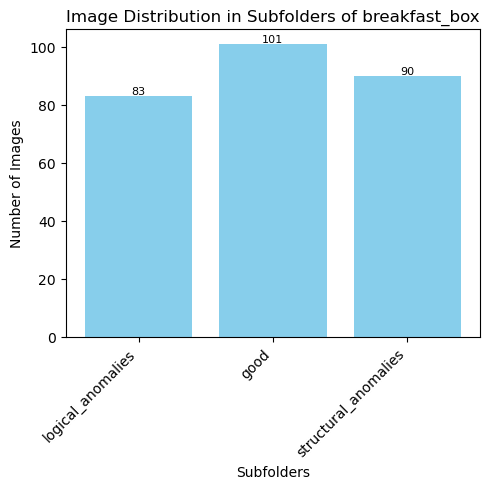

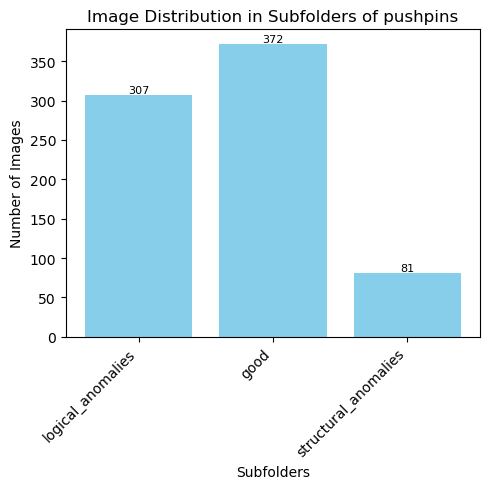

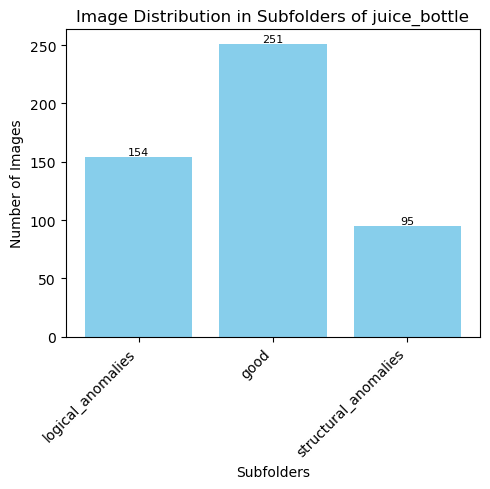

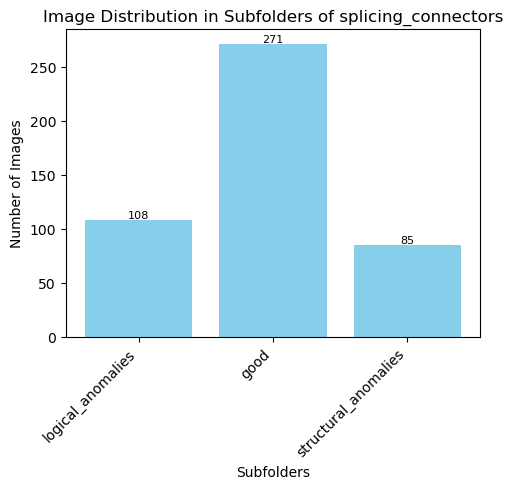

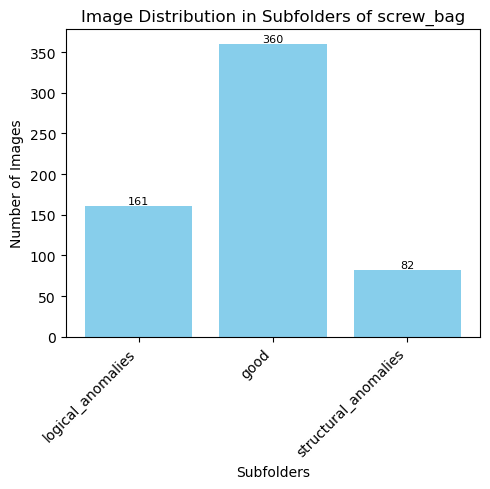

In [23]:
import os
import matplotlib.pyplot as plt

# Define the path to the Downloads folder
downloads_folder = os.path.expanduser('~/Downloads/labeled_dataset_loco')

# Function to count images in a folder and its subfolders
def count_images(folder_path):
    total_count = 0
    subdirectories = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    if subdirectories:  # If the folder contains subdirectories
        for subdirectory in subdirectories:
            subdirectory_path = os.path.join(folder_path, subdirectory)
            total_count += count_images(subdirectory_path)  # Recursively count images in subdirectories
    else:
        total_count += len([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
    return total_count

# List of folders in the Downloads folder
folders = folder_items

# Plotting separate bar charts for each subfolder within each folder
for folder in folders:
    subfolders = [subfolder for subfolder in os.listdir(os.path.join(downloads_folder, folder)) 
                  if os.path.isdir(os.path.join(downloads_folder, folder, subfolder))]
    
    # Count images in each subfolder
    image_counts = {}
    for subfolder in subfolders:
        if subfolder == 'ground_truth':
            ground_truth_folder = os.path.join(downloads_folder, folder, subfolder)
            ground_truth_subfolders = [subfolder for subfolder in os.listdir(ground_truth_folder)
                                       if os.path.isdir(os.path.join(ground_truth_folder, subfolder))]
            for ground_truth_subfolder in ground_truth_subfolders:
                folder_path = os.path.join(ground_truth_folder, ground_truth_subfolder)
                if ground_truth_subfolder in ['logical_anomalies', 'structural_anomalies']:
                    image_counts[ground_truth_subfolder] = count_images(folder_path)
        else:
            folder_path = os.path.join(downloads_folder, folder, subfolder)
            image_counts[subfolder] = count_images(folder_path)

    # Plotting
    plt.figure(figsize=(5, 5))
    bars = plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
    plt.xlabel('Subfolders')
    plt.ylabel('Number of Images')
    plt.title(f'Image Distribution in Subfolders of {folder}')
    plt.xticks(rotation=45, ha='right')

    # Annotate the total number of images above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=8)
    
    plt.tight_layout()
    plt.show()


In [26]:
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the labeled dataset directory
train_data_dir = downloads_folder

# Define the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 5  # Update this line with the correct number of classes in your dataset

# Create the Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Change activation to 'softmax'
model = Model(inputs=base_model.input, outputs=predictions)

# Adjust the batch size, learning rate, and augmentation parameters
batch_size = 64
learning_rate = 0.0001

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])

# Create data generators for training and validation with augmentation
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.4
)

train_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='sparse',  # Update class_mode to 'sparse'
    subset='training'
)

val_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='sparse',  # Update class_mode to 'sparse'
    subset='validation'
)


# Print batch size
print("Batch size for train generator:", train_generator.batch_size)
print("Batch size for validation generator:", val_generator.batch_size)

# Print number of samples
print("Number of training samples:", train_generator.samples)
print("Number of validation samples:", val_generator.samples)

# Print number of classes
print("Number of classes:", train_generator.num_classes)

# Print class labels
print("Class labels:", train_generator.class_indices)

# Print number of batches
num_train_batches = len(train_generator)
num_val_batches = len(val_generator)
print("Number of batches for training:", num_train_batches)
print("Number of batches for validation:", num_val_batches)

# Print shape of a batch
batch_x, batch_y = next(train_generator)
print("Shape of a batch of input data:", batch_x.shape)
print("Shape of a batch of labels:", batch_y.shape)



Found 1562 images belonging to 5 classes.
Found 1039 images belonging to 5 classes.


In [27]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=2
)

Epoch 1/2
24/24 ━━━━━━━━━━━━━━━━━━━━ 162s 6s/step - accuracy: 0.5053 - loss: 1.2342 - val_accuracy: 0.9736 - val_loss: 0.0736
Epoch 2/2
 1/24 ━━━━━━━━━━━━━━━━━━━━ 1:21 4s/step - accuracy: 0.8750 - loss: 0.3208

2024-03-31 18:29:21.922214: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/mahin/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8750 - loss: 0.1671 - val_accuracy: 1.0000 - val_loss: 0.0219


2024-03-31 18:29:22.130737: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


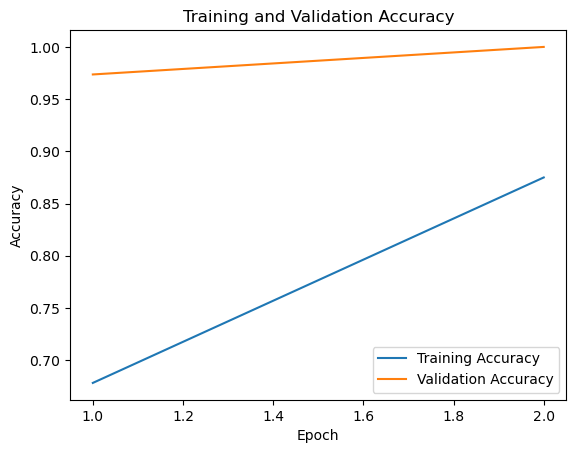

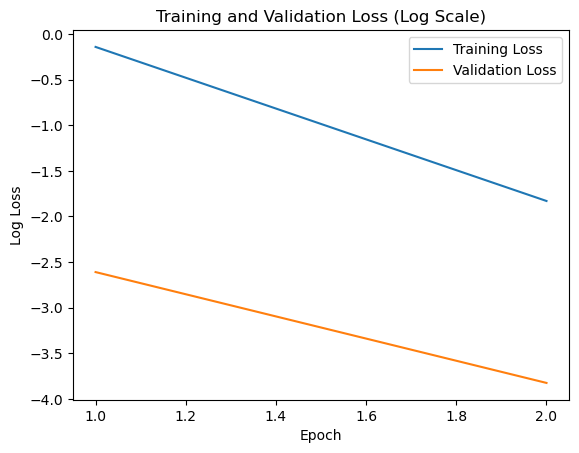

Best Validation Accuracy: 1.0000
Best Validation Loss: 0.0219


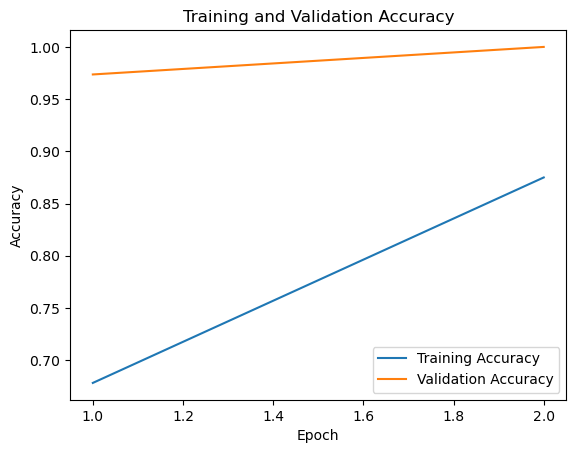

In [28]:
# Plot the training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss using a logarithmic scale
plt.plot(range(1, len(train_loss) + 1), np.log(train_loss), label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), np.log(val_loss), label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss (Log Scale)')
plt.legend()
plt.show()

# Create the accuracy plot
plt.figure()
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
# Save the accuracy plot as an image
plt.savefig('accuracy_plot.png', bbox_inches='tight')

# Calculate and display the best validation accuracy and loss
best_val_accuracy = max(val_accuracy)
best_val_loss = min(val_loss)
print(f'Best Validation Accuracy: {best_val_accuracy:.4f}')
print(f'Best Validation Loss: {best_val_loss:.4f}')

In [29]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the input shape and number of classes (Make sure to use the same values as in the training)
input_shape = (224, 224, 3)
num_classes = 5  # Update this line with the correct number of classes in your dataset

# Define the path to the labeled dataset directory
test_data_dir = os.path.expanduser('~/Downloads/labeled_dataset_loco')  # Update this with the path to your labeled dataset



# Create a data generator for testing
test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='sparse',  # Use 'sparse' for numerical class labels
    shuffle=False
)

# Make predictions on the test data
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the anomaly percentage
total_images = len(true_labels)
anomaly_count = np.sum(predicted_labels != true_labels)
anomaly_percentage = (anomaly_count / total_im1ages) * 100

# Print the anomaly percentage and accuracy
accuracy = (1 - (anomaly_count / total_images)) * 100
print(f'Accuracy: {accuracy:.2f}%')
print(f'Anomaly Percentage: {anomaly_percentage:.2f}%')


Found 2601 images belonging to 5 classes.
82/82 ━━━━━━━━━━━━━━━━━━━━ 81s 961ms/step
Accuracy: 87.08%
Anomaly Percentage: 12.92%


Found 2601 images belonging to 5 classes.


/home/mahin/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 80s 958ms/step
Classification Report:
                     precision    recall  f1-score   support

      breakfast_box       0.89      0.71      0.79       274
       juice_bottle       0.81      0.99      0.89       500
           pushpins       0.85      0.90      0.88       760
          screw_bag       0.88      0.89      0.89       603
splicing_connectors       0.98      0.77      0.86       464

           accuracy                           0.87      2601
          macro avg       0.88      0.85      0.86      2601
       weighted avg       0.88      0.87      0.87      2601



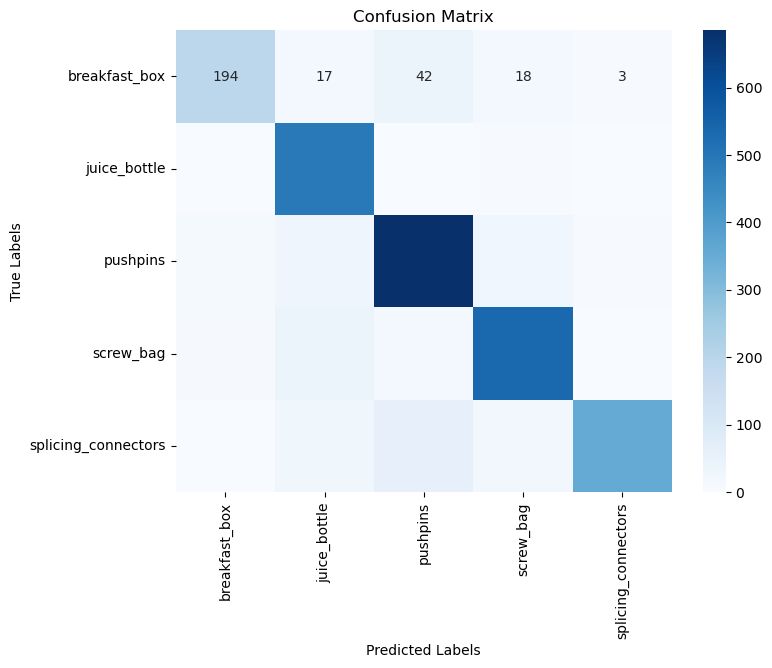

True class distribution:
{'breakfast_box': 274, 'juice_bottle': 500, 'pushpins': 760, 'screw_bag': 603, 'splicing_connectors': 464}
Predicted class distribution:
{'breakfast_box': 219, 'juice_bottle': 608, 'pushpins': 803, 'screw_bag': 607, 'splicing_connectors': 364}


In [33]:
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

# Define the input shape and number of classes (Make sure to use the same values as in the training)
input_shape = (224, 224, 3)
num_classes = 5

# Create data generator for testing data
test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='sparse',
    subset='training',  # Use the training subset for testing
    shuffle=False  # Important to keep the order of predictions and ground truth labels
)

# Get the true labels for the test data
true_labels = test_generator.classes

# Get the predictions for the test data
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate and print classification report
class_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Calculate and plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


plt.show()



# Get the true and predicted class distributions
true_class_distribution = np.bincount(true_labels, minlength=num_classes)
predicted_class_distribution = np.bincount(predicted_labels, minlength=num_classes)

print("True class distribution:")
print(dict(zip(class_names, true_class_distribution)))

print("Predicted class distribution:")
print(dict(zip(class_names, predicted_class_distribution)))

